<a href="https://colab.research.google.com/github/PraveenPrabhat125/Data-Preprocessing/blob/main/Data_Formatting_and_Data_Binning_Practice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 # Data Formatting And Data Binning solution Notebook
.
 <br>
 <br>
 It's time to get your hands dirty dude!!
 -Bit mL

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

 Python list <b>headers</b> containing name of headers


In [2]:
# These are the headers which you need to link to your dataset.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# Import Datasets

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [5]:
df = pd.read_csv('car_dataset.data', names = headers)

 Use the method <b>head()</b> to display the first five rows of the dataframe.


In [6]:
# To see what the data set looks like, we'll use the head() method.
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div>

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>


<h1 id="identify_handle_missing_values">Identify and handle missing values</h1>

<h2 id="identify_missing_values">Identify missing values</h2>
<h3>Convert "?" to NaN</h3>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B


In [7]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Identify_missing_values

<h2>Evaluating for Missing Data</h2>

The missing values are converted to default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.


<h2>Count missing values in each column</h2>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values.
</p>


In [9]:
for column in headers:
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<h2 id="deal_missing_values">Deal with missing data</h2>
<br>
<h3>How to deal with missing data?</h3>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four".
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h3>Calculate the average of the normalized-losses column </h3>


In [10]:
avg_norm_loss = df["normalized-losses"].astype('float').mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h3>Replace "NaN" by mean value in "normalized-losses" column</h3>


In [11]:
df["normalized-losses"].replace(np.nan, avg_norm_loss,inplace = True)

<h3>Calculate the mean value for 'bore' column</h3>


In [12]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


<h3>Replace NaN by mean value for bore column</h3>


In [13]:
df["bore"].replace(np.nan, avg_bore,inplace = True)

<h3>Calculate the mean value for 'stroke' column</h3>

In [15]:

avg_bore=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_bore)

Average of stroke: 3.255422885572139


<h3>Replace NaN by mean value for stroke column</h3>

In [16]:
df["stroke"].replace(np.nan, avg_bore, inplace=True)

<details><summary>Click here for the solution</summary>

```python
#Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
```

</details>


<h4>Calculate the mean value for the  'horsepower' column:</h4>


In [17]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" by mean value:</h4>


In [18]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for 'peak-rpm' column:</h4>


In [20]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace NaN by mean value:</h4>


In [21]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<br>

## Alright you have done great job till now, but its not finished yet dude!!!
<br>

<ul>
<li>Now we have done for replacing with mean.</li>
<li>Its time to replace null values with most frequent values </li>
<li>We will do this for num-of-doors column</li>
</ul>

<h4>Find the most frequent value for num of doors</h4>

In [22]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

<h4>We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:</h4>


In [23]:
df['num-of-doors'].value_counts().idxmax()

'four'

<h4>The replacement procedure is very similar to what we have seen previously</h4>


In [24]:
#replace the missing 'num-of-doors' values by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

## Finally, let's drop all rows that do not have price data:


In [25]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

<h2> Lets Check It</h2>

In [ ]:
missing_data = df.isnull()
missing_data.head(5)

for column in headers:
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

Hurrey!!!
Now we have our dataset with no missing values.
<br>
Isn't It?

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Lets Start Data Formatting

In [27]:
to_float = ["bore", "stroke","peak-rpm","price","normalized-losses"]
df[to_float] = df[to_float].astype("float")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Data Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>

In [29]:
#Lets first change the data type of horsepower because I forgot to include it in to_float list of upper cell.
df["horsepower"]=df["horsepower"].astype(float)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

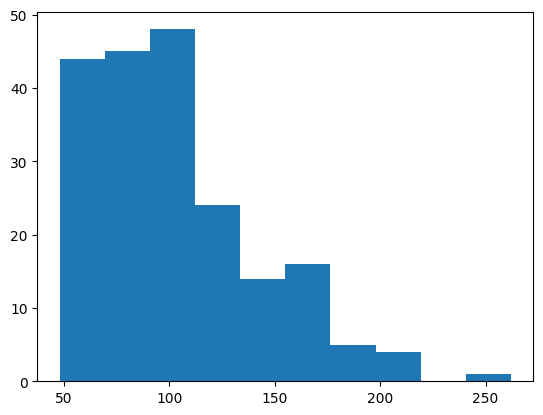

In [35]:
plt.hist(df['horsepower'])

In [39]:
bin_group = ['low', 'medium', 'high']
print(bin_group)

bin_value = np.linspace(min(df['horsepower']), max(df['horsepower']), 4 )
print(bin_value)

['low', 'medium', 'high']
[ 48.         119.33333333 190.66666667 262.        ]


In [44]:
df['horsepower_bin'] = pd.cut(df['horsepower'], bin_value, include_lowest = True, labels = bin_group)

df[['horsepower', 'horsepower_bin']]

,horsepower,horsepower_bin
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low
...,...,...
196,114.0,low
197,160.0,medium
198,134.0,medium
199,106.0,low


In [45]:
df[['horsepower_bin']].value_counts()

horsepower_bin
low               153
medium             43
high                5
Name: count, dtype: int64

<BarContainer object of 3 artists>

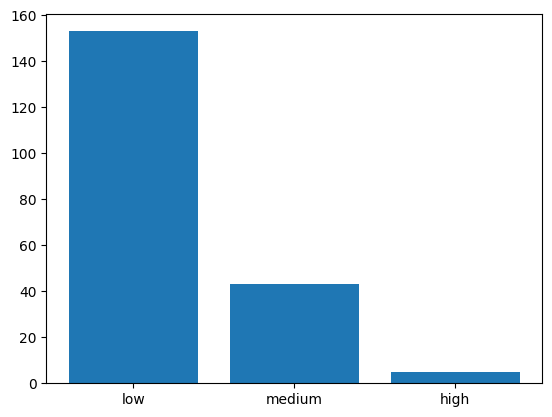

In [54]:
plt.bar(bin_group, df['horsepower_bin'].value_counts())

In [57]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [60]:
# price bin
price_bin = ['low', 'medium', 'high']
print(price_bin)

price_bin_size = np.linspace(min(df['price']), max(df['price']), 4)
print(price_bin_size)


['low', 'medium', 'high']
[ 5118.         18545.33333333 31972.66666667 45400.        ]


In [63]:
# let  use cut to bin it
df['price_bin'] = pd.cut(df['price'], price_bin_size, include_lowest = True, labels = price_bin)

df[['price', 'price_bin']]

,price,price_bin
0,13495.0,low
1,16500.0,low
2,16500.0,low
3,13950.0,low
4,17450.0,low
...,...,...
196,16845.0,low
197,19045.0,medium
198,21485.0,medium
199,22470.0,medium


<BarContainer object of 3 artists>

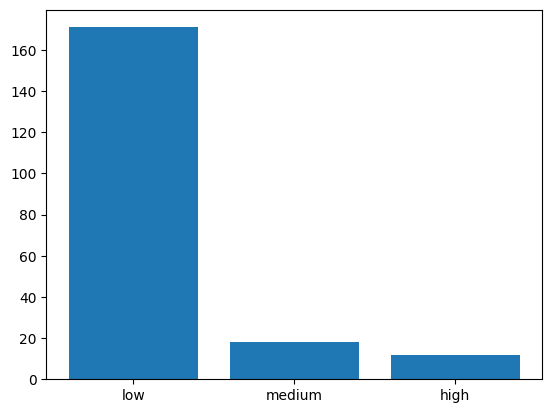

In [70]:
# plt.bar(price_bin, df['price_bin'].value_counts())
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(price_bin, df['price_bin'].value_counts())

<br>
<br>

# REALLY IT WAS A GREAT JOB DUDE!!!
<h4>LETS START LEARNING DATA FORMATING & DATA STANDARDIZATION.</h4>
<h4>There you will learn how to correct the data types of each columns in proper way. </h4>
<br>
<br>

# Bit ML
<h4>We make complex simple.</h4>
<h4>It's Easy If you learn like this.</h4>

# Thank you So much.